# Predict the probability of Heart Disease - CS4661 - Jaquan Jones
(Question 2)

In [1]:
# library imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as mpl

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import preprocessing

### A. In this question, we work with a simplified version of Heart dataset. Read the dataset file “Heart_short.csv” ([from github](https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv)), and assign it to a Pandas DataFrame.

In [2]:
# read csv data to dataframe
df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

df

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No
...,...,...,...,...,...,...,...
276,45,110,264,0,132,1.2,Yes
277,68,144,193,0,141,3.4,Yes
278,57,130,131,0,115,1.2,Yes
279,57,130,236,2,174,0.0,Yes


### B. Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.



In [3]:
# define feature matrix columns for feature matrix
feature_labels = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']

X = df[feature_labels] 

X

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,63,145,233,2,150,2.3
1,67,160,286,2,108,1.5
2,67,120,229,2,129,2.6
3,37,130,250,0,187,3.5
4,41,130,204,2,172,1.4
...,...,...,...,...,...,...
276,45,110,264,0,132,1.2
277,68,144,193,0,141,3.4
278,57,130,131,0,115,1.2
279,57,130,236,2,174,0.0


In [4]:
# define label vector
y_categorical = df['AHD']

numerical_label = lambda label: 0 if label == 'No' else 1

df['NumericalAHD'] = [numerical_label(value) for value in y_categorical]
# df['NumericalAHD'] = df['AHD'].apply(numerical_label)

y = df['NumericalAHD']

y

0      0
1      1
2      1
3      0
4      0
      ..
276    1
277    1
278    1
279    1
280    0
Name: NumericalAHD, Length: 281, dtype: int64

In [5]:
# normalize (scale) features
normalized_X = preprocessing.scale(X)

normalized_X

array([[ 0.94788279,  0.74978425, -0.25859799,  1.04743633, -0.00919313,
         1.13182982],
       [ 1.38542704,  1.59842565,  0.75330422,  1.04743633, -1.84813139,
         0.43550978],
       [ 1.38542704, -0.6646181 , -0.33496796,  1.04743633, -0.92866226,
         1.39294984],
       ...,
       [ 0.29156641, -0.09885716, -2.20603242, -0.96851989, -1.54164168,
         0.17438976],
       [ 0.29156641, -0.09885716, -0.2013205 ,  1.04743633,  1.04162873,
        -0.8700903 ],
       [-1.78676878,  0.35375159, -1.36596267, -0.96851989,  0.99784448,
        -0.8700903 ]])

### C. Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.



In [6]:
# split dataset into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.25, random_state=3)

# check shapes of testing and training sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 6)
(210,)
(71, 6)
(71,)


### D. Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

* Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”).

* Plot the **Roc Curve** for this classifier.
* Compute the **AUC** (Area Under Curve for ROC).

In [7]:
# implementing logistic regression classifier with training/testing datasets
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_predictions = logreg.predict(X_test)

print('Predictions:')
print(y_predictions)
logreg_accuracy_score = accuracy_score(y_test, y_predictions)

print(f'\nLogistic Regression Classifier accuracy score: {logreg_accuracy_score}')

Predictions:
[1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]

Logistic Regression Classifier accuracy score: 0.7183098591549296


In [8]:
# y_pred_prob = 'y predictions probability'
y_pred_prob = logreg.predict_proba(X_test)

print(f'Probability of Heart Disease:\n{y_pred_prob}')

Probability of Heart Disease:
[[0.49847189 0.50152811]
 [0.55153223 0.44846777]
 [0.39514152 0.60485848]
 [0.39636475 0.60363525]
 [0.8463285  0.1536715 ]
 [0.77042084 0.22957916]
 [0.73485372 0.26514628]
 [0.86548609 0.13451391]
 [0.35529864 0.64470136]
 [0.6707959  0.3292041 ]
 [0.09558374 0.90441626]
 [0.91924811 0.08075189]
 [0.29096442 0.70903558]
 [0.43043601 0.56956399]
 [0.66808153 0.33191847]
 [0.85924791 0.14075209]
 [0.11598482 0.88401518]
 [0.68324451 0.31675549]
 [0.11239963 0.88760037]
 [0.33485811 0.66514189]
 [0.85412798 0.14587202]
 [0.86376748 0.13623252]
 [0.22496489 0.77503511]
 [0.92910529 0.07089471]
 [0.10918691 0.89081309]
 [0.57443365 0.42556635]
 [0.72926897 0.27073103]
 [0.43211917 0.56788083]
 [0.67752917 0.32247083]
 [0.77600088 0.22399912]
 [0.30112704 0.69887296]
 [0.10864797 0.89135203]
 [0.17558051 0.82441949]
 [0.89158205 0.10841795]
 [0.81006702 0.18993298]
 [0.01129614 0.98870386]
 [0.06726456 0.93273544]
 [0.73258706 0.26741294]
 [0.20480859 0.79519

In [9]:
# calculate true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

print(f'False positive rate:\n\n{fpr}\n\nTrue positive rate:\n\n{tpr}')


False positive rate:

[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]

True positive rate:

[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [10]:
# calculate area under the curve (AUC)
AUC = auc(fpr, tpr)

print(f'Area under curve (AUC) for ROC: {AUC}')

Area under curve (AUC) for ROC: 0.7650406504065042


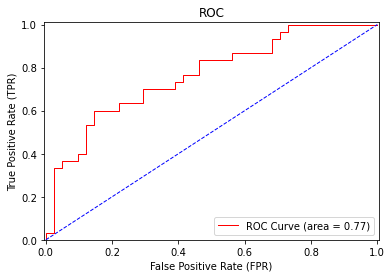

In [11]:
# plotting receiver operating characteristic (ROC) curve
%matplotlib inline

mpl.figure()

# ROC curve
mpl.plot(fpr, tpr, color='red', lw=1, label='ROC Curve (area = %0.2f)' % AUC)

# random guess line
mpl.plot([0,1], [0,1], color='blue', lw=1, linestyle='--')

# range of X and Y axis 
mpl.xlim([-0.005, 1.005])
mpl.ylim([0.0, 1.01])

# axis labels
mpl.xlabel('False Positive Rate (FPR)')
mpl.ylabel('True Positive Rate (TPR)')

# title and legend
mpl.title('ROC')
mpl.legend(loc="lower right")

mpl.show()